# Time series forcasting using Prophet and Arima

In [1]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=70cabae2-dc44-468c-a6d7-2832794eecbd
To: /content/household_power_consumption.txt
100% 133M/133M [00:01<00:00, 86.1MB/s]


### Importing and installing the libraries needed

In [2]:
!pip install prophet
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

## Data Cleaning and Formatting

In [4]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=";")

<ipython-input-4-77070f58f71e>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=";")


Converting to a dataframe

In [5]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

Remove the null values

In [6]:
df.dropna(inplace=True)

#### Add the new coloumn of DateTime for analysis

In [7]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('Datetime', inplace=True)

## ARIMA MODEL

#### dividing the train and test sets

In [8]:
y_train = df['Global_active_power'][:int(len(df) * 0.7)]
y_test = df['Global_active_power'][int(len(df) * 0.7):]

#### Fit the model

In [9]:
model = ARIMA(y_train, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Predictions and the accuracy by RSME scores

In [10]:
# Generate predictions
predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RMSE: 1.0668195841858406


In [11]:
print(predictions.head())

1434496    0.643432
1434497    0.660087
1434498    0.671416
1434499    0.674753
1434500    0.672779
Name: predicted_mean, dtype: float64


### Explanation of ARIMA Model Implementation

In this section, we implemented an ARIMA model to forecast the 'Global_active_power' from the household power consumption dataset. Here is a detailed explanation of the steps involved:

1. **Data Cleaning and Formatting**:
    - We imported the necessary libraries and read the dataset.
    - Converted the 'Global_active_power' column to numeric and removed any null values.
    - Created a new 'Datetime' column by combining the 'Date' and 'Time' columns and set it as the index.

2. **ARIMA Model**:
    - Divided the dataset into training and testing sets, with 70% of the data used for training and the remaining 30% for testing.
    - Fitted an ARIMA model to the training data with the order (5, 1, 0).

3. **Predictions and Evaluation**:
    - Generated predictions for the test set using the fitted ARIMA model.
    - Calculated the Root Mean Squared Error (RMSE) to evaluate the accuracy of the predictions.

The RMSE value provides an indication of how well the model's predictions match the actual values in the test set.

# Prophet Model

In [12]:
data = df.copy()
data['ds'] = df.index
data = data.rename(columns={'Global_active_power': 'y'})

In [13]:
train_size_prophet = int(len(data) * 0.8)
train_df = data[:train_size_prophet]
test_df = data[train_size_prophet:]

In [14]:
from prophet import Prophet

In [15]:
prophet_model = Prophet()
prophet_model.fit(train_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzsz77poa/7rq6burt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzsz77poa/j8enpw37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80650', 'data', 'file=/tmp/tmpzsz77poa/7rq6burt.json', 'init=/tmp/tmpzsz77poa/j8enpw37.json', 'output', 'file=/tmp/tmpzsz77poa/prophet_modelwzw8rtgm/prophet_model-20241126134008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:40:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
future_dates_7days = prophet_model.make_future_dataframe(periods=7 * 24, freq='H')
future_dates_30days = prophet_model.make_future_dataframe(periods=30 * 24, freq='H')

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


### Explanation of Prophet Model Implementation

In this section, we implemented a Prophet model to forecast 'Global_active_power'. Here are the steps:

1. **Data Preparation**:
    - Copied the dataframe, created 'ds' column from the index, and renamed 'Global_active_power' to 'y'.

2. **Train-Test Split**:
    - Split the data into 80% training and 20% testing sets.

3. **Model Training**:
    - Imported Prophet, instantiated, and fitted the model to the training data.

4. **Future Dates Creation**:
    - Created future dates for 7 and 30 days with hourly frequency for forecasts.

Prophet handles daily time series data, capturing seasonality, holidays, and trend changes.


# Visualization

#### 7 day forecast

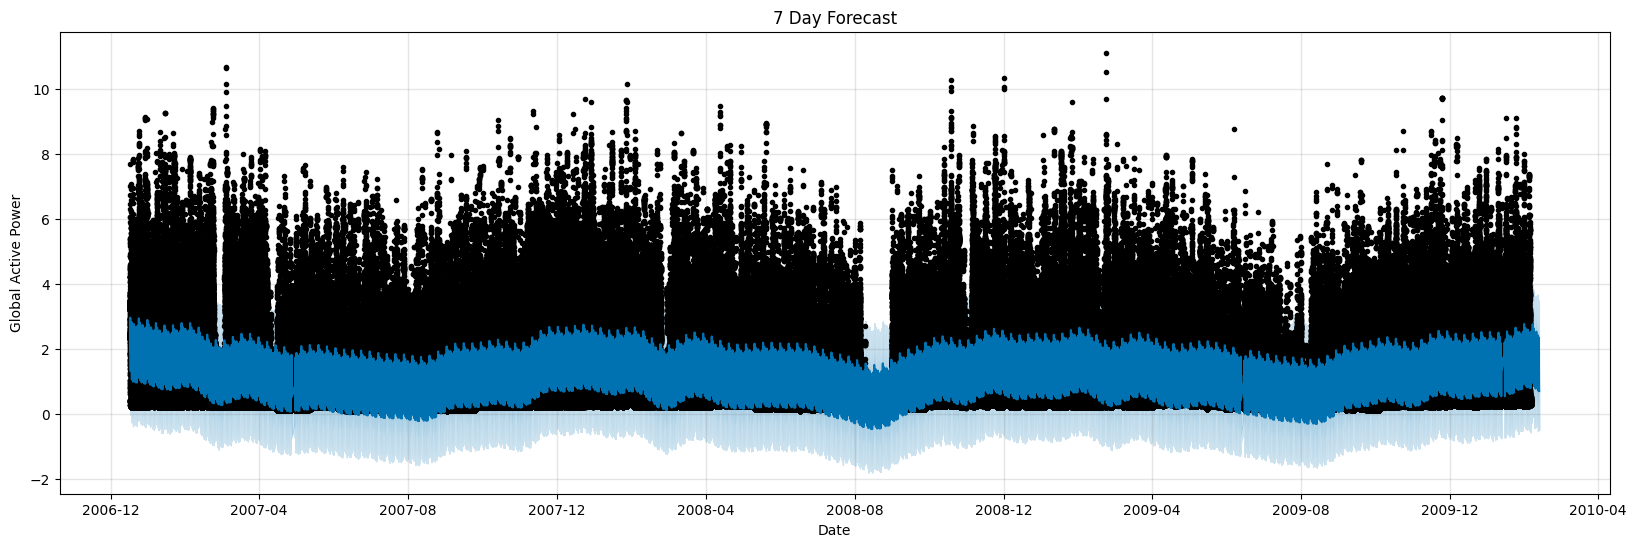

In [17]:
import matplotlib.pyplot as plt

# Generate forecast for 7 days
forecast_7days = prophet_model.predict(future_dates_7days)

# Plot the forecast
fig, ax = plt.subplots(figsize=(20, 6))
prophet_model.plot(forecast_7days, ax=ax)
plt.title('7 Day Forecast')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.show()

#### 30 day forecast

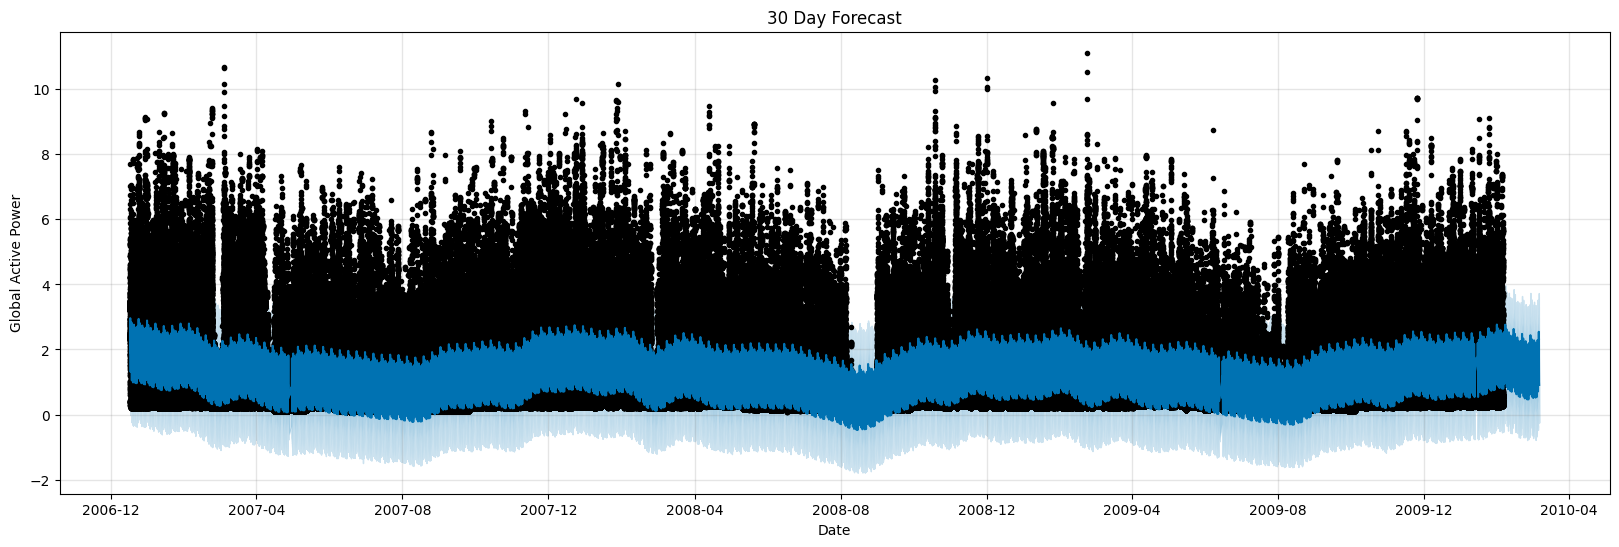

In [18]:
# Generate forecast for 30 days
forecast_30days = prophet_model.predict(future_dates_30days)

# Plot the forecast
fig, ax = plt.subplots(figsize=(20, 6))
prophet_model.plot(forecast_30days, ax=ax)
plt.title('30 Day Forecast')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.show()

#### plot components

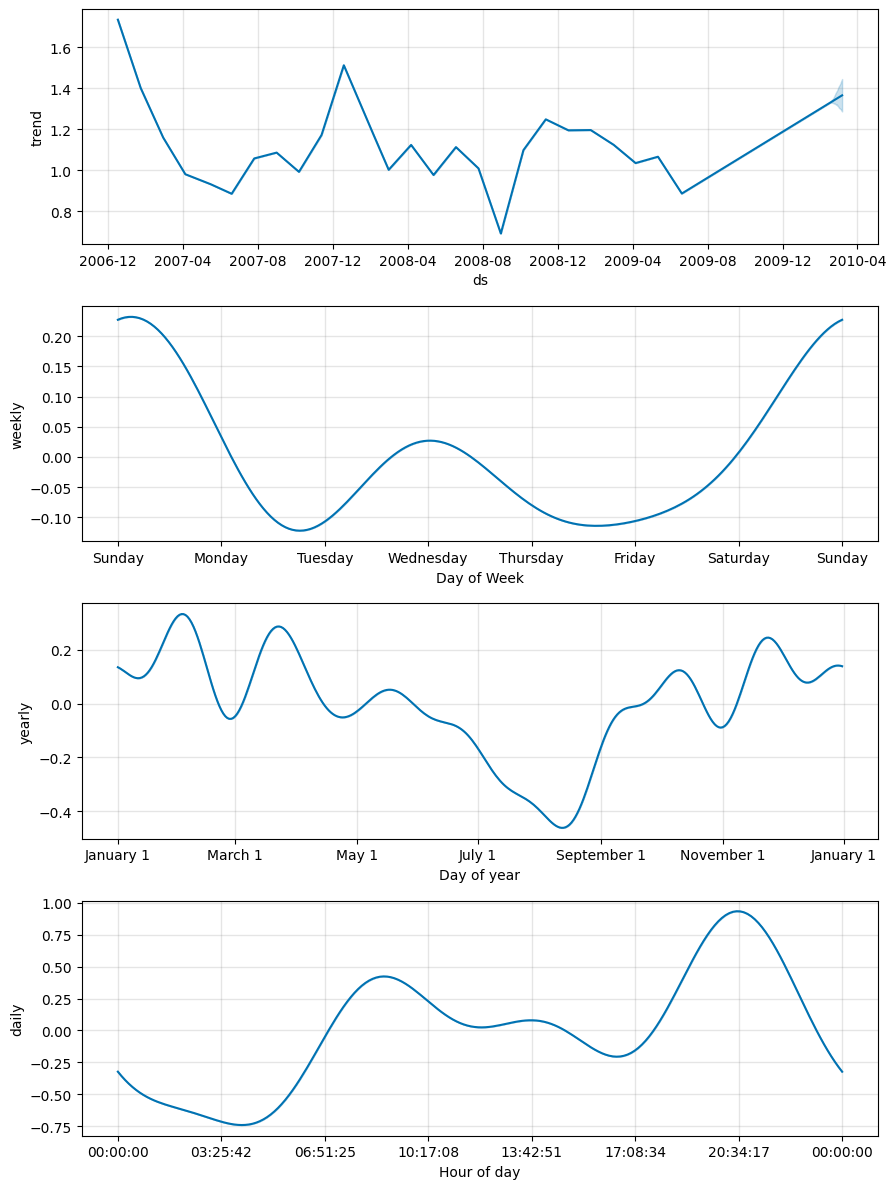

In [19]:
# Plot the components of the forecast
fig = prophet_model.plot_components(forecast_30days)
plt.show()

# Observations

## Observations for Prophet Model

The Prophet model was implemented to forecast 'Global_active_power' from the household power consumption dataset. Here are the key observations:

1. **Data Preparation**: The dataframe was copied, a 'ds' column was created from the index, and the 'Global_active_power' column was renamed to 'y'.

2. **Model Training**: The dataset was split into 80% training and 20% testing sets. The Prophet model was instantiated and fitted to the training data.

3. **Future Dates Creation**: Future dates for 7 and 30 days with hourly frequency were created for forecasts.

4. **Predictions**: The model generated forecasts for the specified future dates. The forecasts were visualized to understand the predicted trends and patterns.

5. **Performance**: Prophet is designed to handle daily time series data, capturing seasonality, holidays, and trend changes, making it suitable for various forecasting tasks.

Overall, the Prophet model provided a flexible and robust approach to time series forecasting, with the ability to incorporate seasonality and holidays into the predictions.